In [2]:
# we are sing pandas for this example

# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('data_new_new.csv')
features.head()

,gender,SpO2,HR,age,health
0,1,93,82,68,1
1,1,98,72,61,9
2,2,100,91,78,9
3,1,98,59,58,6
4,1,100,63,78,9


In [5]:
#we have details of our data set, this confirm correct data - set in our variable (features)

#Information on Data - Set
print('The shape of our features is:', features.shape)


The shape of our features is: (1303, 5)


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 5 columns):
gender    1303 non-null int64
SpO2      1303 non-null int64
HR        1303 non-null int64
age       1303 non-null int64
health    1303 non-null int64
dtypes: int64(5)
memory usage: 51.0 KB


In [8]:
categorical = list(features.select_dtypes(include=['object']).columns.values)
categorical

[]

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0, len(categorical)):
    features[categorical[i]] = le.fit_transform(features[categorical[i]])
features.head()

,gender,SpO2,HR,age,health
0,1,93,82,68,1
1,1,98,72,61,9
2,2,100,91,78,9
3,1,98,59,58,6
4,1,100,63,78,9


In [10]:
features['gender'].value_counts()

1    658
2    645
Name: gender, dtype: int64

c:\users\dharmendra\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\dharmendra\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\dharmendra\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instea

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E9A3CD0>,
      dtype=object)

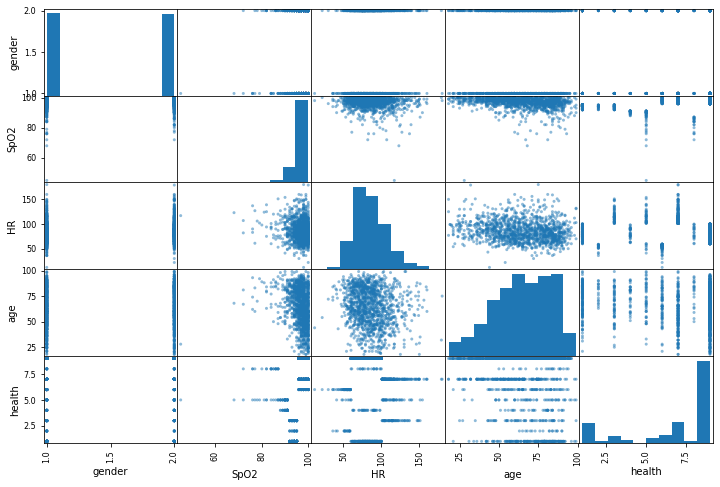

In [11]:
from pandas.plotting import scatter_matrix
attributes = ["gender", "SpO2", "HR", "age", "health"]
scatter_matrix(features[attributes], figsize = (12,8))

In [12]:
#features.plot(kind="scatter", x="SpO2", y="health", alpha=0.8)

In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 5 columns):
gender    1303 non-null int64
SpO2      1303 non-null int64
HR        1303 non-null int64
age       1303 non-null int64
health    1303 non-null int64
dtypes: int64(5)
memory usage: 61.1 KB


In [14]:
# shape tells us matrix dimension we have or data in

# Descriptive statistics for each column
features.describe()

,gender,SpO2,HR,age,health
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,1.495012,96.419800,85.702993,64.733691,6.851113
std,0.500167,3.871136,21.273944,18.011572,2.903083
min,1.000000,45.000000,12.000000,18.000000,1.000000
25%,1.000000,95.000000,71.000000,52.000000,5.000000
50%,1.000000,97.000000,83.000000,66.000000,9.000000
75%,2.000000,99.000000,98.000000,80.000000,9.000000
max,2.000000,100.000000,180.000000,99.000000,9.000000


In [15]:
# above we have more in depth description of our data - set

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,0:].head(5)

,gender,SpO2,HR,age,health
0,1,93,82,68,1
1,1,98,72,61,9
2,2,100,91,78,9
3,1,98,59,58,6
4,1,100,63,78,9


In [16]:


# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['health'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('health', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [17]:
# above we converted the data set variable into numpy array (to make it easier to work with in pandas)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [18]:
# we made training set i.e the set of data we train our model with and test set i.e the data set we test our data on
# it is important that the testing set is not known to model while training
# we calulate our accuracy with this only

# Use numpy to convert to arrays
import numpy as np

# Convert to numpy array
features = np.array(features)

In [19]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features = train_test_split(features, test_size = 0.25, random_state = 42)

In [20]:
print(test_labels)

[9 9 9 7 4 9 9 9 9 9 1 9 1 6 6 9 9 9 1 9 1 4 9 9 8 7 9 9 9 5 9 1 3 1 9 9 5
 1 1 8 6 9 9 7 7 9 6 7 1 7 3 9 9 9 9 9 9 6 9 9 7 9 9 9 3 6 9 7 7 9 9 9 9 7
 9 6 1 9 9 1 1 9 9 1 7 1 1 1 1 5 1 9 9 9 1 9 9 7 9 7 7 9 9 1 9 9 5 7 7 9 9
 7 9 6 1 1 2 9 3 9 7 9 9 9 7 3 7 9 9 9 1 3 5 7 9 9 7 1 9 9 9 9 9 1 9 3 9 9
 9 7 7 1 9 6 7 3 6 6 9 1 9 9 1 7 7 9 6 9 4 5 9 8 3 9 2 1 9 3 1 9 1 9 8 7 7
 3 1 9 9 7 7 9 9 9 9 3 4 9 1 9 7 9 3 1 3 7 9 9 5 9 5 1 9 9 9 9 1 9 9 7 9 4
 9 9 9 9 9 4 9 9 9 9 9 9 7 3 2 9 9 9 9 9 9 7 9 9 3 9 9 9 7 5 9 7 9 1 9 7 9
 9 9 9 1 9 7 9 9 1 9 9 6 7 9 7 9 1 9 7 9 3 5 1 1 9 3 7 9 8 2 1 9 9 1 9 9 1
 7 1 1 9 9 2 7 9 9 9 9 9 9 9 9 9 7 9 7 7 7 9 1 7 1 9 7 9 1 9]


In [21]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (977, 4)
Training Labels Shape: (977,)
Testing Features Shape: (326, 4)
Testing Labels Shape: (326,)


In [22]:
print()

In [23]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('age')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  57.74


In [24]:
# Import the model we are using
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
# Instantiate model with 1000 decision trees
#rf = LinearRegression()
#rf = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#rf = RandomForestRegressor()
#rf = KNeighborsClassifier()
# Train the model on training data
rf.fit(train_features, train_labels);

In [25]:
# we imported the model using sci-learn kit

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '')
print(errors)
#print(n12)

Mean Absolute Error: 0.01 
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.019 0.    0.    0.    0.    0.
 0.304 0.    0.    0.    0.    0.1   0.    0.    0.    0.    0.    0.
 0.128 0.    0.    0.414 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.1   0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.008 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.003 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.

In [26]:
# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / test_labels)
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#accuracy = 100 - Mean Absolute Error
#print('Accuracy:', round(accuracy, 2), '%.')

In [27]:
#from sklearn.metrics import accuracy_score
#y_pred = [predictions]
#y_true = [test_labels]
#accuracy_score(y_true, y_pred)
#accuracy_score(y_true, y_pred, normalize=False)

In [28]:
#Accuracy: 
#    LinearRegression = 94.05 %.
#    DecisionTreeRegressor = 91.78 %.
#    RandomForestRegressor = 93.45 %.

In [29]:
predictions

array([9.   , 9.   , 9.   , 7.   , 4.   , 9.   , 9.   , 9.   , 9.   ,
       9.   , 1.   , 9.   , 1.   , 6.   , 6.   , 9.   , 9.   , 9.   ,
       1.019, 9.   , 1.   , 4.   , 9.   , 9.   , 7.696, 7.   , 9.   ,
       9.   , 9.   , 4.9  , 9.   , 1.   , 3.   , 1.   , 9.   , 9.   ,
       4.872, 1.   , 1.   , 7.586, 6.   , 9.   , 9.   , 7.   , 7.   ,
       9.   , 6.   , 7.   , 1.   , 7.   , 3.   , 9.   , 9.   , 9.   ,
       9.   , 9.   , 9.   , 6.   , 9.   , 9.   , 7.   , 9.   , 9.   ,
       9.   , 3.   , 6.   , 9.   , 7.   , 7.   , 9.   , 9.   , 9.   ,
       9.   , 7.   , 9.   , 6.   , 1.   , 9.   , 9.   , 1.   , 1.   ,
       9.   , 9.   , 1.   , 7.   , 1.   , 1.   , 1.   , 1.   , 4.9  ,
       1.   , 9.   , 9.   , 9.   , 1.   , 9.   , 9.   , 7.   , 9.   ,
       7.   , 7.   , 9.   , 9.   , 1.   , 9.   , 9.   , 5.   , 7.   ,
       7.   , 9.   , 9.   , 7.   , 9.   , 6.   , 1.   , 1.   , 1.992,
       9.   , 3.   , 9.   , 7.   , 9.   , 9.   , 9.   , 7.   , 3.   ,
       7.   , 9.   ,

In [30]:
features[1]

array([ 1, 98, 72, 61], dtype=int64)

In [31]:
from joblib import dump, load
dump(rf, 'health.joblib')

['health.joblib']

In [32]:
from joblib import dump, load
import numpy as np
model = load('health.joblib')
features = np.array([[1,96 ,85, 30]])
model.predict(features)


array([9.])

In [33]:
def getAccuracy(testset, predictions):
    correct=0
    for x in range(len(testset)):
        if testset[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testset)))*100.0   
        

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)

In [35]:
rmse

0.04017416072781169

In [36]:
#testset = [[test_features]]
#predictions = [[test_labels]]
#accuracy = getAccuracy(testset, predictions)
#print(accuracy)

In [37]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')

Accuracy: 99.81 %.
